In [1]:


import andi
import numpy as np
import csv as csv
import numpy as np

from sklearn.metrics import mean_absolute_error
import tensorflow as tf



import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import losses, metrics

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM

from keras.layers import Dropout
from keras.layers import Bidirectional
#from keras.models import load_model
from tensorflow.keras.models import load_model
import os
from matplotlib import pyplot as plt
from data_split import data_split
from many_net import many_net, many_net_diffv, many_net_only_diff, many_net_only_diff_cont, many_net_only_diff_cont_varc

Using TensorFlow backend.


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import losses, metrics

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM

from keras.layers import Dropout
from keras.layers import Bidirectional
#from keras.models import load_model
from tensorflow.keras.models import load_model
import os
from matplotlib import pyplot as plt
from data_split import data_split
from many_net import many_net, many_net_diffv, many_net_only_diff

In [2]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv1D, Dropout, BatchNormalization, Flatten

from keras.regularizers import l2 as regularizer_l2

from keras.optimizers import Adam

In [5]:
AD = andi.andi_datasets()


Important to create a "balanced" data set

In [18]:
bb={}
cc={}
cl=25+100*np.arange(10)
j=0
for i in cl:
    X1, Y1, X2, Y2, X3, Y3 = AD.andi_dataset(N = 10000, tasks = 2, dimensions = 1,
                                             min_T = i, max_T = i+1, save_dataset=True, path_datasets=str(i)+'multi')
    bb[i]=X2[0]
    cc[i]=Y2[0]

Creating a dataset for task(s) 2 and dimension(s) 1.
Generating dataset for dimension 1.
Creating a dataset for task(s) 2 and dimension(s) 1.
Generating dataset for dimension 1.
Creating a dataset for task(s) 2 and dimension(s) 1.
Generating dataset for dimension 1.
Creating a dataset for task(s) 2 and dimension(s) 1.
Generating dataset for dimension 1.
Creating a dataset for task(s) 2 and dimension(s) 1.
Generating dataset for dimension 1.
Creating a dataset for task(s) 2 and dimension(s) 1.
Generating dataset for dimension 1.
Creating a dataset for task(s) 2 and dimension(s) 1.
Generating dataset for dimension 1.
Creating a dataset for task(s) 2 and dimension(s) 1.
Generating dataset for dimension 1.
Creating a dataset for task(s) 2 and dimension(s) 1.
Generating dataset for dimension 1.
Creating a dataset for task(s) 2 and dimension(s) 1.
Generating dataset for dimension 1.


In [12]:
bbv={}
ccv={}
cl=25+100*np.arange(10)
j=0
for i in cl:
    X1, Y1, X2, Y2, X3, Y3 = AD.andi_dataset(N = 1000, tasks = 2, dimensions = 1,
                                             min_T = i, max_T = i+1, load_dataset=True, path_datasets=str(i)+'multi_val')
    bbv[i]=X2[0]
    ccv[i]=Y2[0]

Creating a dataset for task(s) 2 and dimension(s) 1.
Creating a dataset for task(s) 2 and dimension(s) 1.
Creating a dataset for task(s) 2 and dimension(s) 1.
Creating a dataset for task(s) 2 and dimension(s) 1.
Creating a dataset for task(s) 2 and dimension(s) 1.
Creating a dataset for task(s) 2 and dimension(s) 1.
Creating a dataset for task(s) 2 and dimension(s) 1.
Creating a dataset for task(s) 2 and dimension(s) 1.
Creating a dataset for task(s) 2 and dimension(s) 1.
Creating a dataset for task(s) 2 and dimension(s) 1.


In [ ]:
ccm={}
for i in cl:
    ccm[i]=np.zeros((len(cc[i]),5))
    print(ccm[i])
    print(ccm[i][j][2])
    for j in range(len(cc[i])):
        ccm[i][j][int(cc[i][j])]=1

In [13]:
ccvm={}
for i in cl:
    ccvm[i]=np.zeros((len(ccv[i]),5))
    print(ccvm[i])
    print(ccvm[i][j][2])
    for j in range(len(ccv[i])):
        ccvm[i][j][int(ccv[i][j])]=1

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0.0
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0.0
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0.0
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0.0
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0.0
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0.0
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0.0
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0.0
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 .

In [8]:
#FUNCTION TO TURN SPLIT DATA IN NORMALIZED SUB-TRAJECTORIES.
#Possible to choose data corresponding to a certain interval of h
#USING TIMES TOO Otpion to normalize!!
#Should find a more elegant way of using the hmin and hmax, now i have to express it anyway
def data_split(data_tot,meas_times,labels,start_row,num_row,traj_len,
               n_in,n_samples,hmin=0.,hmax=1,limith=False,normalization=True,p_p=1):
    '''
    returns data_tot: collection of recorded trajectories and associated time stamps,
    split into normalized sub-trajectories. It also returns the associated labels, and
    separately the time stamps and trajectories.
    PARAMETERS EXPLANATION:
    meas_times: times at which the position was recorded,
    labels: the true exponent corresponding with which the trajectory was generated
    start_row: exclude recorded trajectories with index i<start_row
    num_row: number of recorde trajectories to use (NB the actual number
    will be <total number-start_row) 
    traj_len: length of the trajectory segments to output
    n_in: starting data point from the recorded data
    n_samples: number of the trajectory segments to take from each recorded trajectory
    h_min: use only trajectories genearted with h>h_min
    h_max: use only trajectories genearted with h<h_max
    p_p: factor introduced to roughly normalize the time steps so that the total trajectory
    duration is close to 1'''
    j=0



    tr=data_tot[start_row:num_row+start_row]
    sel_times=meas_times[start_row:num_row+start_row]
    tar=labels[start_row:num_row+start_row]

    if(limith==True):
        
        tr=tr[np.where((tar<=hmax) & (tar >=hmin))]
        sel_times=sel_times[np.where((tar<=hmax) & (tar >=hmin))]
        tar=tar[((tar<=hmax) & (tar >=hmin))]

    if(n_samples>1):
        
        gap=int((data_tot.shape[1]-n_in-traj_len)/(n_samples-1))
    else:
        gap=0    
    print("n initial=",n_in,"gap=",gap)
    if(gap<traj_len):
        print("warning!! Overlapping trajectories. gap=",
              gap,"trajectory length=",traj_len,"final_point=",
              (n_samples-1)*gap+n_in+traj_len,"data length",data_tot.shape[1])

    if(normalization==True):
        trj=tr[:,n_in+gap*j:n_in+gap*j+traj_len]
        test_data_new=(trj-(np.tile(np.transpose([np.mean(trj,axis=1)]),
                                    (1,traj_len))))/(np.tile(np.transpose([np.std(trj,axis=1)]),
                                                             (1,traj_len)))
        test_times=np.cumsum(np.insert(np.diff(sel_times[:,n_in+gap*j:n_in+gap*j+traj_len])
                                       ,0,0, axis=1),axis=1)
#train_data_new=(data_tot[start_row:30000,:traj_len]-(np.tile(np.transpose([np.mean(data_tot[start_row:30000,:traj_len],axis=1)]),(1,traj_len))))/(np.tile(np.transpose([np.std(data_tot[start_row:30000,:traj_len],axis=1)]),(1,traj_len)))
        test_labels_large=tar
#test_labels=labels[start_row:num_row+start_row]
        #print(test_data_new.shape)
        #print("trj=",trj.shape)
        #print("sart=",n_in+gap*j,"end=",n_in+gap*j+traj_len)
        for j in range(1,n_samples):
            trj=tr[:,n_in+gap*j:n_in+gap*j+traj_len]
            #print("sart=",n_in+gap*j,"end=",n_in+gap*j+traj_len)
            #print(trj.shape)
            test_data_new=np.concatenate((test_data_new,(trj-(np.tile(np.transpose([np.mean(trj,axis=1)]),(1,traj_len))))/(np.tile(np.transpose([np.std(trj,axis=1)]),(1,traj_len)))),axis=0)
    #test_data_new=np.concatenate((test_data_new,(data_tot2[:,n_in+gap*j:n_in+gap*j+traj_len]-np.mean(data_tot2[:,n_in+gap*j:n_in+gap*j+traj_len]))/np.std(data_tot2[:,n_in+gap*j:n_in+gap*j+traj_len])),axis=0)
            test_labels_large=np.append(test_labels_large,tar)
            test_times=np.concatenate((test_times,np.cumsum(np.insert(np.diff(sel_times[:,n_in+gap*j:n_in+gap*j+traj_len]),0,0, axis=1),axis=1)),axis=0)
    #test_labels=np.append(test_labels,many_label2)  
    else:
        test_data_new=tr[:,n_in+gap*j:n_in+gap*j+traj_len]
        test_times=np.cumsum(np.insert(np.diff(sel_times[:,n_in+gap*j:n_in+gap*j+traj_len]),
                                       0,0, axis=1),axis=1)
#train_data_new=(data_tot[start_row:30000,:traj_len]-(np.tile(np.transpose([np.mean(data_tot[start_row:30000,:traj_len],axis=1)]),(1,traj_len))))/(np.tile(np.transpose([np.std(data_tot[start_row:30000,:traj_len],axis=1)]),(1,traj_len)))
        test_labels_large=tar
#test_labels=labels[start_row:num_row+start_row]
        for j in range(1,n_samples):
            test_data_new=np.concatenate((test_data_new,tr[:,n_in+gap*j:n_in+gap*j+traj_len]),
                                         axis=0)
    #test_data_new=np.concatenate((test_data_new,(data_tot2[:,n_in+gap*j:n_in+gap*j+traj_len]-np.mean(data_tot2[:,n_in+gap*j:n_in+gap*j+traj_len]))/np.std(data_tot2[:,n_in+gap*j:n_in+gap*j+traj_len])),axis=0)
            test_labels_large=np.append(test_labels_large,tar)
            test_times=np.concatenate((test_times,np.cumsum(
                np.insert(np.diff(sel_times[:,n_in+gap*j:n_in+gap*j+traj_len]),0,0, axis=1),
                axis=1)),axis=0)
    #test_labels=np.append(test_labels,many_label2) 
        


#normalization of time stamps, potentially dangerous!!!!!!!
    test_times=test_times*p_p/traj_len
    
#RESHAPING
    test_set=np.transpose(np.array((np.transpose(test_data_new),np.transpose(test_times))))  
    return test_set, test_labels_large, test_data_new,test_times
   

In [63]:
#LTSM network for learning  the Hurst exponet H, Normalized trajectories!!!

#Building the network
model_classi_norm_chi = Sequential()
#first layer: LSTM of dimension 64
model_classi_norm_chi.add(LSTM(64,
                return_sequences=True,
                dropout=0,
                recurrent_dropout=0,
                input_shape=(None, 1)
                ))

#second layer: LSTM of dimension 16
model_classi_norm_chi.add(LSTM(16,
                dropout=0,
                recurrent_dropout=0))
#Last layer, fully connected
model_classi_norm_chi.add(Dense(5))
model_classi_norm_chi.add(Dense(5,activation= 'softmax'))

model_classi_norm_chi.compile(optimizer='adam',
                loss='binary_crossentropy', 
                metrics=['accuracy'])

#Printing a summary of the built network
model_classi_norm_chi.summary()

#Training the network first with minibatches of size 32 for 10 epochs, 
#then with minibatches of size 128
    


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, None, 64)          16896     
_________________________________________________________________
lstm_10 (LSTM)               (None, 16)                5184      
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 85        
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 30        
Total params: 22,195
Trainable params: 22,195
Non-trainable params: 0
_________________________________________________________________


In [64]:
for batch_size in [32,128]:#[32, 128]:
    j=0
   
    for i in [25,925,125,825,225,725,325,625,525,425]:
    
        print('traj length=',i,'batch size=', batch_size,'\n')

        test_tim_step=np.arange(i)
        show_time_coll=np.tile(test_tim_step,(len(bb[i]),1))
        data_show,label_show,traj_show,times_show=data_split(np.asarray(bb[i]),
                                                             show_time_coll,labels=np.asarray(ccm[i]),
                                                             start_row=0,num_row=10000,traj_len=i,n_in=0,
                                                             n_samples=1,p_p=1,hmin=0.25,hmax=0.75,
                                                             limith=False,normalization=True)

        print('traj length=',i,'batch size=', batch_size,'\n')
        history_classi_norm_chi = model_classi_norm_chi.fit(traj_show.reshape(len(traj_show),i,1), 
                        label_show,validation_split=0.2,
                        epochs=10-int(i/200), 
                        batch_size=batch_size,
                        shuffle=True)
    #                     ,validation_data=(data_val, 
    #                     label_val))

traj length= 25 batch size= 32 

n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 25 final_point= 25 data length 25
traj length= 25 batch size= 32 

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 10s 1ms/step - loss: 0.4767 - accuracy: 0.8001 - val_loss: 0.4596 - val_accuracy: 0.8049
Epoch 2/10
8000/8000 [==============================] - 7s 863us/step - loss: 0.4494 - accuracy: 0.8050 - val_loss: 0.4468 - val_accuracy: 0.8062
Epoch 3/10
8000/8000 [==============================] - 8s 950us/step - loss: 0.4346 - accuracy: 0.8121 - val_loss: 0.4294 - val_accuracy: 0.8150
Epoch 4/10
8000/8000 [==============================] - 8s 1ms/step - loss: 0.4231 - accuracy: 0.8160 - val_loss: 0.4165 - val_accuracy: 0.8189
Epoch 5/10
8000/8000 [==============================] - 11s 1ms/step - loss: 0.4093 - accuracy: 0.8212 - val_loss: 0.4073 - val_accuracy: 0.8209
Epoch 6/10
8000/8000 [======================

Epoch 7/7
8000/8000 [==============================] - 214s 27ms/step - loss: 0.3558 - accuracy: 0.8437 - val_loss: 0.3534 - val_accuracy: 0.8440
traj length= 325 batch size= 32 

n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 325 final_point= 325 data length 325
traj length= 325 batch size= 32 

Train on 8000 samples, validate on 2000 samples
Epoch 1/9
8000/8000 [==============================] - 92s 12ms/step - loss: 0.3837 - accuracy: 0.8306 - val_loss: 0.3636 - val_accuracy: 0.8390
Epoch 2/9
8000/8000 [==============================] - 93s 12ms/step - loss: 0.3507 - accuracy: 0.8430 - val_loss: 0.3680 - val_accuracy: 0.8372
Epoch 3/9
8000/8000 [==============================] - 89s 11ms/step - loss: 0.3595 - accuracy: 0.8410 - val_loss: 0.3476 - val_accuracy: 0.8434
Epoch 4/9
8000/8000 [==============================] - 88s 11ms/step - loss: 0.3401 - accuracy: 0.8489 - val_loss: 0.3348 - val_accuracy: 0.8515
Epoch 5/9
8000/8000 [==================

Epoch 4/7
8000/8000 [==============================] - 108s 13ms/step - loss: 0.1837 - accuracy: 0.9151 - val_loss: 0.1788 - val_accuracy: 0.9144
Epoch 5/7
8000/8000 [==============================] - 107s 13ms/step - loss: 0.1840 - accuracy: 0.9157 - val_loss: 0.1801 - val_accuracy: 0.9123
Epoch 6/7
8000/8000 [==============================] - 113s 14ms/step - loss: 0.1801 - accuracy: 0.9178 - val_loss: 0.1814 - val_accuracy: 0.9102
Epoch 7/7
8000/8000 [==============================] - 106s 13ms/step - loss: 0.1788 - accuracy: 0.9197 - val_loss: 0.1789 - val_accuracy: 0.9140
traj length= 525 batch size= 128 

n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 525 final_point= 525 data length 525
traj length= 525 batch size= 128 

Train on 8000 samples, validate on 2000 samples
Epoch 1/8
8000/8000 [==============================] - 87s 11ms/step - loss: 0.1901 - accuracy: 0.9121 - val_loss: 0.1954 - val_accuracy: 0.9079
Epoch 2/8
8000/8000 [=============

In [66]:
np.sum(model_classi_norm_chi.predict(traj_show.reshape(len(traj_show),i,1)[:10]),axis=1)

array([1.0000001 , 1.0000001 , 0.99999994, 1.        , 1.        ,
       0.99999994, 1.        , 1.        , 1.        , 1.0000001 ],
      dtype=float32)

In [62]:
np.sum(model_classi_norm_chi.predict(traj_show.reshape(len(traj_show),i,1)[:10]),axis=1)

array([1.        , 0.99999994, 0.9999999 , 1.0000001 , 0.9999999 ,
       1.0000001 , 0.9999999 , 1.        , 1.        , 1.        ],
      dtype=float32)

In [84]:
from sklearn.metrics import f1_score
for i in cl:
    groundtruth = np.argmax(ccvm[i], axis = 1)
    test_tim_step=np.arange(i)
    show_time_coll=np.tile(test_tim_step,(len(bbv[i]),1))
    data_show,label_show,traj_show,times_show=data_split(np.asarray(bbv[i]),
                                                             show_time_coll,labels=np.asarray(ccvm[i]),
                                                             start_row=0,num_row=10000,traj_len=i,n_in=0,
                                                             n_samples=1,p_p=1,hmin=0.25,hmax=0.75,
                                                             limith=False,normalization=True)

    predictions = np.argmax(model_classi_norm_chi.predict(traj_show.reshape(len(traj_show),i,1)), axis = 1)

    print(f1_score(groundtruth, predictions, average='micro'))
                            

n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 25 final_point= 25 data length 25
0.34
n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 125 final_point= 125 data length 125
0.589
n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 225 final_point= 225 data length 225
0.684
n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 325 final_point= 325 data length 325
0.747
n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 425 final_point= 425 data length 425
0.768
n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 525 final_point= 525 data length 525
0.793
n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 625 final_point= 625 data length 625
0.791
n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 725 final_point= 725 data length 725
0.802
n in

In [94]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(groundtruth, predictions)

fig, ax = plt.subplots(figsize = (7,7))
ax.matshow(conf)
for (i, j), z in np.ndenumerate(conf):
    ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center', fontsize = 16)
ax.set_xticklabels(['c','ATTM','CTRW','FBM','LW','SBM'], fontsize = 16)
ax.set_yticklabels(['a','ATTM','CTRW','FBM','LW','SBM'], fontsize = 16)
ax.set_xlabel('Predicted class', fontsize = 16)
ax.set_ylabel('Groundtruth', fontsize = 16)
ax.xaxis.set_ticks_position('bottom') 

In [97]:
import csv
trajs_from_files = csv.reader(open('datasets/development_for_scoring_new/task2.txt','r'), delimiter=';', 
                                        lineterminator='\n',quoting=csv.QUOTE_NONNUMERIC)
validation = [[],[],[]]
for trajs in enumerate(trajs_from_files):
    validation[int(trajs[1][0])-1].append(trajs[1][1:])

predictions=[]

for traj in validation[0]:
    traj=(traj-np.mean(traj))/np.std(traj)
    #print(np.mean(traj),np.std(traj))
    predictions.append(model_classi_norm_chi.predict(np.asarray(traj).reshape(1,len(traj),1)).flatten())
    

In [109]:
len(predictions[0])

5

In [113]:
predictions[0][4]

0.0006655277

In [118]:
pred_to_txt = np.ones((len(predictions), 6))
for i in range(len(predictions)):
    for j in range(5):
        
        pred_to_txt[i, j+1] = predictions[i][j]

np.savetxt('task2.txt', pred_to_txt.astype(float), fmt = '%1.5f', delimiter = ';')

In [120]:
model_classi_norm_chi.save('task2_1d_classi_norm_chi.h5')


# Specialize the net on traj that are 100 long

In [6]:
model_classi_norm_100=load_model('task2_1d_classi_norm_chi.h5')


In [7]:
bb={}
cc={}
cl=[100]
j=0
for i in cl:
    X1, Y1, X2, Y2, X3, Y3 = AD.andi_dataset(N = 50000, tasks = 2, dimensions = 1,
                                             min_T = i, max_T = i+1, save_dataset=True, path_datasets=str(i)+'multi')
    bb[i]=X2[0]
    cc[i]=Y2[0]

Creating a dataset for task(s) 2 and dimension(s) 1.
Generating dataset for dimension 1.


/Users/stebo/anaconda3/lib/python3.7/site-packages/fbm/fbm.py:172: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  "Combination of increments n and Hurst value H "
/Users/stebo/anaconda3/lib/python3.7/site-packages/andi/diffusion_models.py:85: RuntimeWarning: overflow encountered in power
  dt = (1-np.random.rand(T))**(-1/sigma)


In [9]:
ccm={}
for i in cl:
    ccm[i]=np.zeros((len(cc[i]),5))
    print(ccm[i])
    print(ccm[i][j][2])
    for j in range(len(cc[i])):
        ccm[i][j][int(cc[i][j])]=1

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0.0


In [10]:
ccm

{100: array([[0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.]])}

In [11]:
for batch_size in [32,128]:#[32, 128]:
    j=0
   
    for i in [100]:
    
        print('traj length=',i,'batch size=', batch_size,'\n')

        test_tim_step=np.arange(i)
        show_time_coll=np.tile(test_tim_step,(len(bb[i]),1))
        data_show,label_show,traj_show,times_show=data_split(np.asarray(bb[i]),
                                                             show_time_coll,labels=np.asarray(ccm[i]),
                                                             start_row=0,num_row=len(bb[i]),traj_len=i,n_in=0,
                                                             n_samples=1,p_p=1,hmin=0,hmax=2,
                                                             limith=False,normalization=True)

        print('traj length=',i,'batch size=', batch_size,'\n')
        history_classi_norm_100 = model_classi_norm_100.fit(traj_show.reshape(len(traj_show),i,1), 
                        label_show,validation_split=0.2,
                        epochs=10-int(i/200), 
                        batch_size=batch_size,
                        shuffle=True)
    #                     ,validation_data=(data_val, 
    #                     label_val))

traj length= 100 batch size= 32 

n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 100 final_point= 100 data length 100
traj length= 100 batch size= 32 

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 149s 4ms/step - loss: 0.2630 - accuracy: 0.8793 - val_loss: 0.2549 - val_accuracy: 0.8825
Epoch 2/10
40000/40000 [==============================] - 141s 4ms/step - loss: 0.2499 - accuracy: 0.8853 - val_loss: 0.2508 - val_accuracy: 0.8860
Epoch 3/10
40000/40000 [==============================] - 165s 4ms/step - loss: 0.2430 - accuracy: 0.8882 - val_loss: 0.2448 - val_accuracy: 0.8874
Epoch 4/10
40000/40000 [==============================] - 145s 4ms/step - loss: 0.2381 - accuracy: 0.8904 - val_loss: 0.2562 - val_accuracy: 0.8814
Epoch 5/10
40000/40000 [==============================] - 135s 3ms/step - loss: 0.2338 - accuracy: 0.8919 - val_loss: 0.2377 - val_accuracy: 0.8897
Epoch 6/10
40000/40000 

In [19]:
bbv={}
ccv={}
cl=[100]
j=0
for i in cl:
    X1, Y1, X2, Y2, X3, Y3 = AD.andi_dataset(N = 1000, tasks = 2, dimensions = 1,
                                             min_T = i, max_T = i+1, save_dataset=True, path_datasets=str(i)+'multi_val')
    bbv[i]=X2[0]
    ccv[i]=Y2[0]

Creating a dataset for task(s) 2 and dimension(s) 1.
Generating dataset for dimension 1.


/Users/stebo/anaconda3/lib/python3.7/site-packages/fbm/fbm.py:172: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  "Combination of increments n and Hurst value H "
/Users/stebo/anaconda3/lib/python3.7/site-packages/andi/diffusion_models.py:85: RuntimeWarning: overflow encountered in power
  dt = (1-np.random.rand(T))**(-1/sigma)


In [20]:
ccvm={}
for i in cl:
    ccvm[i]=np.zeros((len(ccv[i]),5))
    print(ccvm[i])
    print(ccvm[i][j][2])
    for j in range(len(ccv[i])):
        ccvm[i][j][int(ccv[i][j])]=1

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0.0


In [21]:
from sklearn.metrics import f1_score
for i in np.array([100]):
    groundtruth = np.argmax(ccvm[i], axis = 1)
    test_tim_step=np.arange(i)
    show_time_coll=np.tile(test_tim_step,(len(bbv[i]),1))
    data_show,label_show,traj_show,times_show=data_split(np.asarray(bbv[i]),
                                                             show_time_coll,labels=np.asarray(ccvm[i]),
                                                             start_row=0,num_row=len(bbv[i]),traj_len=i,n_in=0,
                                                             n_samples=1,p_p=1,hmin=0.25,hmax=0.75,
                                                             limith=False,normalization=True)

    predictions = np.argmax(model_classi_norm_100.predict(traj_show.reshape(len(traj_show),i,1)), axis = 1)

    print(f1_score(groundtruth, predictions, average='micro'))
                            

n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 100 final_point= 100 data length 100
0.691


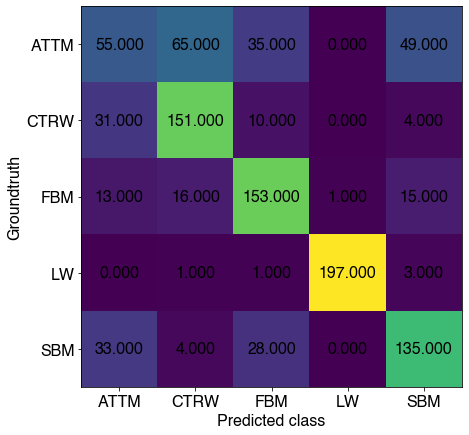

In [22]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(groundtruth, predictions)

fig, ax = plt.subplots(figsize = (7,7))
ax.matshow(conf)
for (i, j), z in np.ndenumerate(conf):
    ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center', fontsize = 16)
ax.set_xticklabels(['c','ATTM','CTRW','FBM','LW','SBM'], fontsize = 16)
ax.set_yticklabels(['a','ATTM','CTRW','FBM','LW','SBM'], fontsize = 16)
ax.set_xlabel('Predicted class', fontsize = 16)
ax.set_ylabel('Groundtruth', fontsize = 16)
ax.xaxis.set_ticks_position('bottom') 

In [15]:
model_classi_norm_100.save('task2_1d_classi_norm_100.h5')


# Specialize the net on traj that are 750 long

In [26]:
model_classi_norm_750=load_model('task2_1d_classi_norm_chi.h5')


In [27]:
bb={}
cc={}
cl=[750]
j=0
for i in cl:
    X1, Y1, X2, Y2, X3, Y3 = AD.andi_dataset(N = 50000, tasks = 2, dimensions = 1,
                                             min_T = i, max_T = i+1, save_dataset=True, path_datasets=str(i)+'multi')
    bb[i]=X2[0]
    cc[i]=Y2[0]

Creating a dataset for task(s) 2 and dimension(s) 1.
Generating dataset for dimension 1.


/Users/stebo/anaconda3/lib/python3.7/site-packages/fbm/fbm.py:172: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  "Combination of increments n and Hurst value H "
/Users/stebo/anaconda3/lib/python3.7/site-packages/andi/diffusion_models.py:85: RuntimeWarning: overflow encountered in power
  dt = (1-np.random.rand(T))**(-1/sigma)


In [29]:
ccm={}
for i in cl:
    ccm[i]=np.zeros((len(cc[i]),5))
    print(ccm[i])
    print(ccm[i][j][2])
    for j in range(len(cc[i])):
        ccm[i][j][int(cc[i][j])]=1

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0.0


In [30]:
for batch_size in [32,128]:#[32, 128]:
    j=0
   
    for i in [750]:
    
        print('traj length=',i,'batch size=', batch_size,'\n')

        test_tim_step=np.arange(i)
        show_time_coll=np.tile(test_tim_step,(len(bb[i]),1))
        data_show,label_show,traj_show,times_show=data_split(np.asarray(bb[i]),
                                                             show_time_coll,labels=np.asarray(ccm[i]),
                                                             start_row=0,num_row=len(bb[i]),traj_len=i,n_in=0,
                                                             n_samples=1,p_p=1,hmin=0,hmax=2,
                                                             limith=False,normalization=True)

        print('traj length=',i,'batch size=', batch_size,'\n')
        history_classi_norm_750 = model_classi_norm_750.fit(traj_show.reshape(len(traj_show),i,1), 
                        label_show,validation_split=0.2,
                        epochs=10-int(i/200), 
                        batch_size=batch_size,
                        shuffle=True)
    #                     ,validation_data=(data_val, 
    #                     label_val))

traj length= 750 batch size= 32 

n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 750 final_point= 750 data length 750
traj length= 750 batch size= 32 

Train on 40000 samples, validate on 10000 samples
Epoch 1/7
40000/40000 [==============================] - 988s 25ms/step - loss: 0.2012 - accuracy: 0.9076 - val_loss: 0.1758 - val_accuracy: 0.9203
Epoch 2/7
40000/40000 [==============================] - 2133s 53ms/step - loss: 0.1808 - accuracy: 0.9186 - val_loss: 0.3767 - val_accuracy: 0.8174
Epoch 3/7
40000/40000 [==============================] - 1656s 41ms/step - loss: 0.2235 - accuracy: 0.8973 - val_loss: 0.1933 - val_accuracy: 0.9125
Epoch 4/7
40000/40000 [==============================] - 951s 24ms/step - loss: 0.1796 - accuracy: 0.9178 - val_loss: 0.1693 - val_accuracy: 0.9211
Epoch 5/7
40000/40000 [==============================] - 927s 23ms/step - loss: 0.1675 - accuracy: 0.9243 - val_loss: 0.1537 - val_accuracy: 0.9300
Epoch 6/7
40000/40000

In [32]:
for batch_size in [256]:#[32, 128]:
    j=0
   
    for i in [750]:
    
        print('traj length=',i,'batch size=', batch_size,'\n')

        test_tim_step=np.arange(i)
        show_time_coll=np.tile(test_tim_step,(len(bb[i]),1))
        data_show,label_show,traj_show,times_show=data_split(np.asarray(bb[i]),
                                                             show_time_coll,labels=np.asarray(ccm[i]),
                                                             start_row=0,num_row=len(bb[i]),traj_len=i,n_in=0,
                                                             n_samples=1,p_p=1,hmin=0,hmax=2,
                                                             limith=False,normalization=True)

        print('traj length=',i,'batch size=', batch_size,'\n')
        history_classi_norm_750 = model_classi_norm_750.fit(traj_show.reshape(len(traj_show),i,1), 
                        label_show,validation_split=0.2,
                        epochs=10-int(i/200), 
                        batch_size=batch_size,
                        shuffle=True)
    #                     ,validation_data=(data_val, 
    #                     label_val))

traj length= 750 batch size= 256 

n initial= 0 gap= 0
warning!! Overlapping trajectories. gap= 0 trajectory length= 750 final_point= 750 data length 750
traj length= 750 batch size= 256 

Train on 40000 samples, validate on 10000 samples
Epoch 1/7
40000/40000 [==============================] - 462s 12ms/step - loss: 0.1242 - accuracy: 0.9447 - val_loss: 0.1299 - val_accuracy: 0.9425
Epoch 2/7
40000/40000 [==============================] - 467s 12ms/step - loss: 0.1227 - accuracy: 0.9460 - val_loss: 0.1260 - val_accuracy: 0.9435
Epoch 3/7
40000/40000 [==============================] - 436s 11ms/step - loss: 0.1212 - accuracy: 0.9462 - val_loss: 0.1263 - val_accuracy: 0.9451
Epoch 4/7
40000/40000 [==============================] - 475s 12ms/step - loss: 0.1203 - accuracy: 0.9472 - val_loss: 0.1252 - val_accuracy: 0.9452
Epoch 5/7
40000/40000 [==============================] - 490s 12ms/step - loss: 0.1202 - accuracy: 0.9466 - val_loss: 0.1326 - val_accuracy: 0.9410
Epoch 6/7
40000/40000

In [33]:
model_classi_norm_750.save('task2_1d_classi_norm_750.h5')


# Combine predictions of different nets

In [35]:
model_classi_norm_chi = load_model('task2_1d_classi_norm_chi.h5')

In [ ]:
model_classi_norm_750 = load_model('task2_1d_classi_norm_750.h5')

In [ ]:
model_classi_norm_100 = load_model('task2_1d_classi_norm_100.h5')

In [36]:
meta_model=[model_classi_norm_100, model_classi_norm_chi ,model_classi_norm_750]

In [37]:
import csv
trajs_from_files = csv.reader(open('validation_for_scoring/task2.txt','r'), delimiter=';', 
                                        lineterminator='\n',quoting=csv.QUOTE_NONNUMERIC)
validation = [[],[],[]]
for trajs in enumerate(trajs_from_files):
    validation[int(trajs[1][0])-1].append(trajs[1][1:])



In [38]:
predictions=[]

for traj in validation[0]:
    traj=(traj-np.mean(traj))/np.std(traj)
    #print(np.mean(traj),np.std(traj))
    predictions.append(model_classi_norm_chi.predict(np.asarray(traj).reshape(1,len(traj),1)).flatten())
    

In [39]:
pred_to_txt = np.ones((len(predictions), 6))
for i in range(len(predictions)):
    for j in range(5):
        
        pred_to_txt[i, j+1] = predictions[i][j]

np.savetxt('task2.txt', pred_to_txt.astype(float), fmt = '%1.5f', delimiter = ';')

In [42]:
#Combining different models according to traj length
predictions_comb=[]

for traj in validation[0]:
    traj=(traj-np.mean(traj))/np.std(traj)
    jj=len(traj)
    k=int(jj/334)
   # print(len(traj),k)
    
    pr_b=meta_model[k].predict(np.asarray(traj).reshape(1,len(traj),1)).flatten()
    if ((len(traj)-k*334>167)and(k<2)):
    #    print("combine!",len(traj),k,len(traj)-k*334)
        pr_2b=meta_model[k+1].predict(np.asarray(traj).reshape(1,len(traj),1)).flatten()
        pr_b=(pr_b+pr_2b)/2
    predictions_comb.append(pr_b)
    

In [43]:
pred_to_txt = np.ones((len(predictions_comb), 6))
for i in range(len(predictions_comb)):
    for j in range(5):
        
        pred_to_txt[i, j+1] = predictions_comb[i][j]

np.savetxt('task2_comb.txt', pred_to_txt.astype(float), fmt = '%1.5f', delimiter = ';')

# Aykut's net with 225

In [33]:
model = tf.keras.models.load_model('Task2_1D_recdout_225.h5')

In [7]:
# regularize trajectories
def data_prepare(X,Y):
    import numpy as np 
    thr=1e-10
    N=len(X)
    x = np.array(X).reshape(N,i) 
    x = np.diff(x,axis=1) 
    sx = np.std(x,axis=1)
    x = (x-np.mean(x,axis=1).reshape(len(x),1)) / np.where(sx>thr,sx,1).reshape(len(x),1)   # normalize x data

    # regularize labels
    label = []
    label.append(np.equal(Y,0))
    label.append(np.equal(Y,1))
    label.append(np.equal(Y,2))
    label.append(np.equal(Y,3))
    label.append(np.equal(Y,4))
    label = np.array(np.transpose(label)) + 0
    return(x, label)

In [15]:
bb={}
cc={}
cl=[225]
j=0
for i in cl:
    X1, Y1, X2, Y2, X3, Y3 = AD.andi_dataset(N = 5000, tasks = 2, dimensions = [1,2],
                                             min_T = i, max_T = i+1, save_dataset=True, path_datasets=str(i)+'multi')
    bb[i]=X2[0]
    cc[i]=Y2[0]

Creating a dataset for task(s) 2 and dimension(s) [1, 2].
Generating dataset for dimension 1.
Generating dataset for dimension 2.


How does it perform when classifiying radial trajectories instead of 1d

In [16]:
len(X2[1][0])

450

In [19]:
x2a=np.asarray(X2[1])

In [20]:
x2a.shape

(5000, 450)

In [ ]:
r=np.sqrt()

In [18]:
i=225
x ,lab = data_prepare(bb[i],cc[i])

In [21]:
model.layers.input_shape

AttributeError: 'list' object has no attribute 'input_shape'

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D


model = Sequential(layers=[
    Conv2D(32, (3, 3), input_shape=(64, 64, 3)),
    MaxPool2D(pool_size=(3, 3), strides=(2, 2))
])

for layer in model.layers:
    print(layer.output_shape)

In [22]:
for layer in model.layers:
    print(layer.output_shape)

(None, None, 250)
(None, 50)
(None, 20)
(None, 5)


In [34]:
pred_ay_new=model.predict(x.reshape(len(x),-1,4))

In [27]:
pred_ay=model.predict(x.reshape(len(x),-1,4))

In [29]:
pred_ay

array([[3.74069214e-01, 1.49655709e-04, 4.92586851e-01, 1.41596147e-05,
        1.33180052e-01],
       [4.68179770e-02, 2.06437471e-04, 7.94500634e-02, 4.08086362e-06,
        8.73521388e-01],
       [3.64787094e-02, 9.63514447e-01, 1.34461175e-07, 6.63784567e-06,
        4.18858939e-08],
       ...,
       [1.47346789e-02, 4.35535476e-05, 8.85182261e-01, 2.53880580e-06,
        1.00036986e-01],
       [2.51054130e-02, 6.77768298e-07, 4.79886069e-07, 9.58238267e-10,
        9.74893451e-01],
       [1.99576959e-01, 7.99345672e-01, 1.05502686e-05, 1.04082259e-03,
        2.59953613e-05]], dtype=float32)

In [30]:
np.argmax(pred_ay, axis = 1)

array([2, 4, 1, ..., 2, 4, 1])

In [32]:
from sklearn.metrics import f1_score

groundtruth = np.argmax(lab, axis = 1)
predictions = np.argmax(pred_ay, axis = 1)

print(f1_score(groundtruth, predictions, average='micro'))
                            

0.8538


In [35]:
from sklearn.metrics import f1_score

groundtruth = np.argmax(lab, axis = 1)
predictions = np.argmax(pred_ay_new, axis = 1)

print(f1_score(groundtruth, predictions, average='micro'))
                            

0.8572


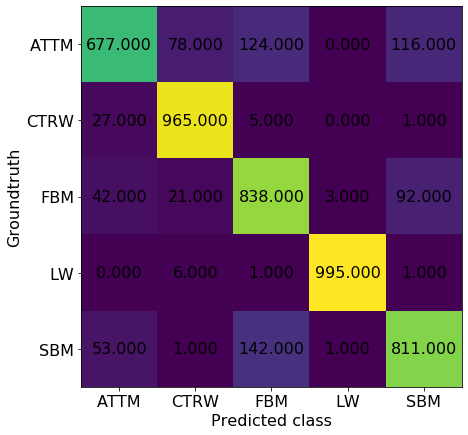

In [36]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(groundtruth, predictions)

fig, ax = plt.subplots(figsize = (7,7))
ax.matshow(conf)
for (i, j), z in np.ndenumerate(conf):
    ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center', fontsize = 16)
ax.set_xticklabels(['c','ATTM','CTRW','FBM','LW','SBM'], fontsize = 16)
ax.set_yticklabels(['a','ATTM','CTRW','FBM','LW','SBM'], fontsize = 16)
ax.set_xlabel('Predicted class', fontsize = 16)
ax.set_ylabel('Groundtruth', fontsize = 16)
ax.xaxis.set_ticks_position('bottom') 

In [2]:
model425 = tf.keras.models.load_model('Task2_1D_recdout_425.h5')

In [8]:
bb={}
cc={}
cl=[425]
j=0
for i in cl:
    X1, Y1, X2, Y2, X3, Y3 = AD.andi_dataset(N = 5000, tasks = 2, dimensions = 1,
                                             min_T = i, max_T = i+1, save_dataset=True, path_datasets=str(i)+'multi')
    bb[i]=X2[0]
    cc[i]=Y2[0]

Creating a dataset for task(s) 2 and dimension(s) 1.
Generating dataset for dimension 1.


/opt/anaconda3/lib/python3.7/site-packages/andi/diffusion_models.py:85: RuntimeWarning: overflow encountered in power
  dt = (1-np.random.rand(T))**(-1/sigma)


In [9]:
i=425
x ,lab = data_prepare(bb[i],cc[i])

In [21]:
model.layers.input_shape

AttributeError: 'list' object has no attribute 'input_shape'

In [10]:
pred_ay_425=model425.predict(x.reshape(len(x),-1,4))

In [13]:
from sklearn.metrics import f1_score

groundtruth = np.argmax(lab, axis = 1)
predictions = np.argmax(pred_ay_425, axis = 1)

print(f1_score(groundtruth, predictions, average='micro'))
                            

0.8972


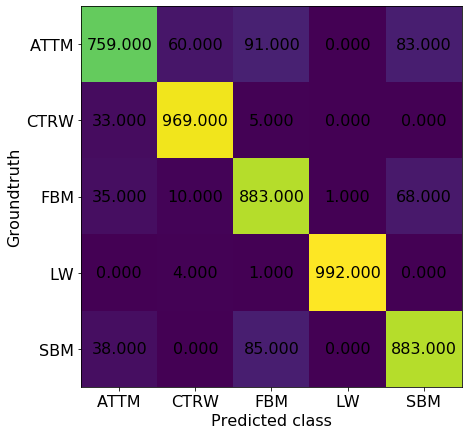

In [14]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(groundtruth, predictions)

fig, ax = plt.subplots(figsize = (7,7))
ax.matshow(conf)
for (i, j), z in np.ndenumerate(conf):
    ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center', fontsize = 16)
ax.set_xticklabels(['c','ATTM','CTRW','FBM','LW','SBM'], fontsize = 16)
ax.set_yticklabels(['a','ATTM','CTRW','FBM','LW','SBM'], fontsize = 16)
ax.set_xlabel('Predicted class', fontsize = 16)
ax.set_ylabel('Groundtruth', fontsize = 16)
ax.xaxis.set_ticks_position('bottom') 

In [26]:
def lw( T, alpha):
            pi=np.pi
            ''' Creates a 2D Levy walk trajectory '''             
            if alpha < 1:
                raise ValueError('Levy walks only allow for anomalous exponents > 1.')             
            # Define exponents for the distribution of times              
            if alpha == 2:
                sigma = np.random.rand()
            else:
                sigma = 3-alpha
            dt = (1-np.random.rand(T))**(-1/sigma)
            print('dt=',dt)
            dt[dt > T] = T+1
            # Define the velocity
            v = 10*np.random.rand()       
            print('v=',v)
            # Define the array where we save step length
            d= np.empty(0)
            # Define the array where we save the angle of the step
            angles = np.empty(0)
            # Generate trajectory
            for t in dt:
                d = np.append(d, v*np.ones(int(t))*(2*np.random.randint(0,2)-1))                
                angles = np.append(angles, np.random.uniform(low = 0, high = 2*pi)*np.ones(int(t)))
                print('d=',d)
                if len(d) > T:
                    break
            d = d[:int(T)]  
            angles = angles[:int(T)] 
            posX, posY = [d*np.cos(angles), d*np.sin(angles)]         
            return np.concatenate((np.cumsum(posX)-posX[0], np.cumsum(posY)-posY[0]))
        

In [27]:
lw( T=30, alpha=1.2)

dt= [1.77164779 2.05615862 1.05685994 1.68530242 1.08954237 3.83838665
 1.22962462 1.44182044 1.05389057 1.15596654 1.30523367 1.32671081
 3.60129085 8.57712512 2.15647801 2.48985854 2.5548548  2.18415061
 1.4872088  1.59656912 1.78442099 2.17736879 3.84109777 1.44804159
 7.12721597 3.67257403 3.38807369 1.75082639 1.50596533 1.17346896]
v= 8.256583319338155
d= [-8.25658332]
d= [-8.25658332 -8.25658332 -8.25658332]
d= [-8.25658332 -8.25658332 -8.25658332  8.25658332]
d= [-8.25658332 -8.25658332 -8.25658332  8.25658332 -8.25658332]
d= [-8.25658332 -8.25658332 -8.25658332  8.25658332 -8.25658332 -8.25658332]
d= [-8.25658332 -8.25658332 -8.25658332  8.25658332 -8.25658332 -8.25658332
 -8.25658332 -8.25658332 -8.25658332]
d= [-8.25658332 -8.25658332 -8.25658332  8.25658332 -8.25658332 -8.25658332
 -8.25658332 -8.25658332 -8.25658332 -8.25658332]
d= [-8.25658332 -8.25658332 -8.25658332  8.25658332 -8.25658332 -8.25658332
 -8.25658332 -8.25658332 -8.25658332 -8.25658332 -8.25658332]
d= [-8.2

array([ 0.        , -3.23620736, -6.47241473, -8.51387   , -0.28467448,
       -8.07378664, -0.61650636,  6.84077392, 14.2980542 , 14.45292427,
       10.96660792, 12.72408548, 20.31311466, 13.42426083, 18.1980415 ,
       21.68368849, 25.16933547, 28.65498246, 36.87562335, 45.09626425,
       53.31690514, 61.53754603, 69.75818693, 77.97882782, 86.19946871,
       94.42010961, 86.18050637, 77.94090313, 78.08219156, 78.22347998,
        0.        ,  7.59592851, 15.19185703, 23.19208381, 23.86402808,
       26.60280514, 23.05877651, 19.51474789, 15.97071926, 24.22584999,
       16.74141505,  8.67404616,  5.42169253,  0.87033437,  7.60696456,
       15.09171126, 22.57645796, 30.06120466, 29.29163893, 28.5220732 ,
       27.75250747, 26.98294174, 26.21337601, 25.44381028, 24.67424455,
       23.90467882, 23.37542786, 22.84617689, 31.10155125, 39.3569256 ])